In [ ]:
import numpy as np
import pandas as pd
e=pd.read_csv('/content/titles.csv')
e

In [ ]:
s=pd.read_csv('/content/credits.csv')  #haracter	13.109832
s

In [ ]:
amazon=pd.merge(e,s,on='id')
amazon

In [ ]:
amazon.columns

Index(['id', 'title', 'type', 'description', 'release_year',
       'age_certification', 'runtime', 'genres', 'production_countries',
       'seasons', 'imdb_id', 'imdb_score', 'imdb_votes', 'tmdb_popularity',
       'tmdb_score', 'person_id', 'name', 'character', 'role'],
      dtype='object')

In [ ]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124347 entries, 0 to 124346
Data columns (total 19 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    124347 non-null  object 
 1   title                 124347 non-null  object 
 2   type                  124347 non-null  object 
 3   description           124256 non-null  object 
 4   release_year          124347 non-null  int64  
 5   age_certification     56707 non-null   object 
 6   runtime               124347 non-null  int64  
 7   genres                124347 non-null  object 
 8   production_countries  124347 non-null  object 
 9   seasons               8153 non-null    float64
 10  imdb_id               119044 non-null  object 
 11  imdb_score            118296 non-null  float64
 12  imdb_votes            118272 non-null  float64
 13  tmdb_popularity       124332 non-null  float64
 14  tmdb_score            114082 non-null  float64
 15  

In [ ]:
amazon.isnull().mean().sort_values(ascending=False)*100

,0
seasons,93.443348
age_certification,54.396166
character,13.114108
tmdb_score,8.255125
imdb_votes,4.885522
imdb_score,4.866221
imdb_id,4.264679
description,0.073182
tmdb_popularity,0.012063
id,0.000000


In [ ]:
amazon

In [ ]:
#checking the number of dublicated rows
Duplicates=amazon.duplicated()
Duplicates.sum()

np.int64(168)

In [ ]:
###Observation:
#168 duplicate records

In [ ]:
#view duplicate records
duplicated_rows=amazon[amazon.duplicated()]
duplicated_rows

In [ ]:
#removing 168 duplicated records
amazon.drop_duplicates(inplace=True)

In [ ]:
amazon.duplicated().sum()

np.int64(0)

In [ ]:
amazon.isnull().mean().sort_values(ascending=False)*100

In [ ]:
#dropping the columns because not useful
#not analytically useful

amazon=amazon.drop('description',axis=1)
amazon=amazon.drop('seasons', axis=1)
amazon=amazon.drop('imdb_id',axis=1)


In [ ]:
amazon['age_certification'] = amazon['age_certification'].fillna('Unknown')
amazon['character']=amazon['character'].fillna('missing')



In [ ]:
amazon['tmdb_popularity'] = amazon['tmdb_popularity'].round(1)


In [ ]:
amazon.isnull().sum().sort_values(ascending=False)

In [ ]:
amazon.shape

(124179, 16)

In [ ]:
amazon[amazon['title']=='The Three Stooges']

In [ ]:
amazon['production_countries'].unique()

array(["['US']", "['GB']", "['MX', 'US']", "['GB', 'CA']", "['DE', 'US']",
       "['SU']", "['IN']", "['CA', 'US']", "['MX']", "['XX']", '[]',
       "['US', 'IT']", "['JP']", "['IT', 'FR']", "['HK']",
       "['FR', 'DE', 'IT']", "['ES', 'IT']", "['GB', 'US']",
       "['IL', 'US']", "['US', 'FR', 'IT']", "['IT']",
       "['IT', 'GB', 'US']", "['GB', 'US', 'IT', 'MX', 'ES']",
       "['AU', 'US']", "['CH', 'GB']", "['CA', 'FR']", "['US', 'IE']",
       "['GB', 'IT']", "['IT', 'US']", "['FR']", "['GR', 'US']", "['DE']",
       "['HK', 'US', 'CN']", "['US', 'ES']", "['PH', 'US']",
       "['NL', 'US']", "['FR', 'US']", "['IT', 'YU']",
       "['FR', 'DE', 'CH', 'CI']", "['PR', 'US']", "['US', 'PH']",
       "['YU', 'US']", "['IT', 'MX']", "['IT', 'ES', 'DE', 'LI']",
       "['US', 'CA']", "['US', 'GB']", "['US', 'DE']",
       "['US', 'IT', 'FR']", "['CA']", "['FR', 'GB']", "['JP', 'KR']",
       "['GR']", "['ES']", "['US', 'JP']", "['SU', 'US']", "['FR', 'DE']",
       "['FR', 'IT']"

In [ ]:
#production_countries are stored as stringified lists — i.e., strings like "['US', 'GB']" rather than actual Python lists.
import ast
amazon['production_countries'] = amazon['production_countries'].apply(
    lambda x: ast.literal_eval(x) if pd.notnull(x) and x != '[]' else []
)


In [ ]:
amazon['production_countries']

,production_countries
0,[US]
1,[US]
2,[US]
3,[US]
4,[US]
...,...
124342,[]
124343,[]
124344,[]
124345,[]


In [ ]:
#exploding rows bcz in lists
amazon=amazon.explode('production_countries')

In [ ]:
#filling the empty rows with unknown
#since only 1.56% data is mising ,wont impact in data distribution
amazon['production_countries'] = amazon['production_countries'].fillna('Unknown')

In [ ]:
amazon['production_countries'].unique()

array(['US', 'GB', 'MX', 'CA', 'DE', 'SU', 'IN', 'XX', 'Unknown', 'IT',
       'JP', 'FR', 'HK', 'ES', 'IL', 'AU', 'CH', 'IE', 'GR', 'CN', 'PH',
       'NL', 'YU', 'CI', 'PR', 'LI', 'KR', 'XC', 'HU', 'TW', 'AN', 'MC',
       'CO', 'RO', 'EG', 'TR', 'BE', 'ZA', 'PT', 'CL', 'SE', 'BR', 'DK',
       'NZ', 'RU', 'LU', 'CZ', 'FI', 'AT', 'SK', 'AR', 'VE', 'TH', 'PL',
       'AE', 'SI', 'BA', 'ID', 'NO', 'AF', 'IR', 'IS', 'BG', 'JM', 'RS',
       'SZ', 'LT', 'TC', 'SG', 'UY', 'BO', 'UA', 'MY', 'TN', 'QA', 'NG',
       'KZ', 'GQ', 'MT', 'SO', 'KE', 'United States of America', 'MA',
       'VN', 'BD', 'FJ', 'MN', 'UG', 'TT', 'PK', 'XK', 'PE', 'DO', 'SV',
       'GE', 'PS', 'HR', 'LV', 'AQ', 'LB', 'KH', 'CR', 'BM', 'JO', 'PA',
       'AL', 'CY', 'CU', 'PY', 'EE', 'ET', 'PF', 'IO', 'AM', 'SY', 'CM',
       'LY'], dtype=object)

In [ ]:
#replacing 'United States of America'with US
amazon['production_countries']=amazon['production_countries'].str.replace('United States of America','US')

In [ ]:
amazon['production_countries'].unique()

array(['US', 'GB', 'MX', 'CA', 'DE', 'SU', 'IN', 'XX', 'Unknown', 'IT',
       'JP', 'FR', 'HK', 'ES', 'IL', 'AU', 'CH', 'IE', 'GR', 'CN', 'PH',
       'NL', 'YU', 'CI', 'PR', 'LI', 'KR', 'XC', 'HU', 'TW', 'AN', 'MC',
       'CO', 'RO', 'EG', 'TR', 'BE', 'ZA', 'PT', 'CL', 'SE', 'BR', 'DK',
       'NZ', 'RU', 'LU', 'CZ', 'FI', 'AT', 'SK', 'AR', 'VE', 'TH', 'PL',
       'AE', 'SI', 'BA', 'ID', 'NO', 'AF', 'IR', 'IS', 'BG', 'JM', 'RS',
       'SZ', 'LT', 'TC', 'SG', 'UY', 'BO', 'UA', 'MY', 'TN', 'QA', 'NG',
       'KZ', 'GQ', 'MT', 'SO', 'KE', 'MA', 'VN', 'BD', 'FJ', 'MN', 'UG',
       'TT', 'PK', 'XK', 'PE', 'DO', 'SV', 'GE', 'PS', 'HR', 'LV', 'AQ',
       'LB', 'KH', 'CR', 'BM', 'JO', 'PA', 'AL', 'CY', 'CU', 'PY', 'EE',
       'ET', 'PF', 'IO', 'AM', 'SY', 'CM', 'LY'], dtype=object)

In [ ]:
#check genre bcz they had also stringified lists
amazon['genres'].unique()

array(["['comedy', 'family', 'animation', 'action', 'fantasy', 'horror']",
       "['action', 'drama', 'war', 'western', 'comedy', 'european']",
       "['romance', 'war', 'drama']", ...,
       "['drama', 'romance', 'comedy', 'history']",
       "['thriller', 'western', 'comedy']",
       "['comedy', 'action', 'family']"], dtype=object)

In [ ]:
import ast
amazon['genres'] = amazon['genres'].apply(
    lambda x: ast.literal_eval(x) if pd.notnull(x) and x != '[]' else []
)
amazon=amazon.explode('genres')

In [ ]:
amazon.isnull().mean().sort_values(ascending=False)*100

In [ ]:
amazon.shape

(392975, 16)

In [ ]:
# Drop rows where genre is missing (clean EDA , since 0.1 data is missing
amazon=amazon.dropna(subset=['genres'])


In [ ]:
amazon[amazon['title']=='The Three Stooges']

In [ ]:
amazon.groupby('id')['title'].count().sort_values(ascending=False)

,title
id,
tm810218,1600
tm185784,1250
tm120849,1212
tm136410,1104
tm124284,1100
...,...
ts83617,1
ts83621,1
tm182091,1


In [ ]:
amazon_prime_video= amazon.groupby('id').agg({
    'title': 'first',
    'type': 'first',
    'release_year': 'first',
    'age_certification': 'first',
    'production_countries': lambda x: ', '.join(sorted(set(x.dropna()))),
    'imdb_votes': 'first',
    'tmdb_popularity': 'first',
    'name':lambda x: ', '.join(sorted(set(x.dropna()))),
    'character': lambda x: ', '.join(sorted(set(x.dropna()))),
    'role':'first',
    'person_id':lambda x: ', '.join(map(str, sorted(set(x.dropna())))),
    'tmdb_score': 'first',
    'imdb_score': 'first',
    'genres': lambda x: ', '.join(sorted(set(x.dropna())))
}).reset_index()


In [ ]:
amazon_prime_video[amazon_prime_video['title']=='The Three Stooges']

,id,title,type,release_year,age_certification,production_countries,imdb_votes,tmdb_popularity,name,character,role,person_id,tmdb_score,imdb_score,genres
2966,tm22932,The Three Stooges,MOVIE,2000,Unknown,US,2011.0,3.6,"Anna Lise Phillips, Brandon Burke, Evan Handle...","Curly Howard, Gertrude Howard, Harry Romm, Hel...",ACTOR,"732, 1581, 9241, 17976, 25260, 25709, 26863, 3...",7.0,6.9,"comedy, drama"
7946,ts20945,The Three Stooges,SHOW,1934,TV-PG,US,1092.0,15.4,"Joe Besser, Larry Fine, Moe Howard","Joe, Larry, Moe",ACTOR,"31460, 31461, 59401",7.6,8.6,"action, animation, comedy, family, fantasy, ho..."


In [ ]:
amazon_prime_video.shape

(8768, 15)

In [ ]:
amazon_prime_video.groupby('id')['title'].count().sort_values(ascending=False).head(30)

In [ ]:
amazon_prime_video.isnull().sum()

In [ ]:
amazon_prime_video.duplicated().sum()

np.int64(0)

In [ ]:
amazon_prime_video

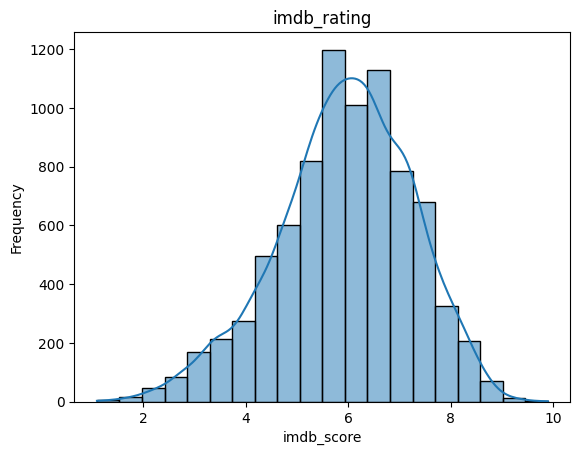

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
amazon_two_data=amazon_prime_video[['imdb_score','id']].copy()
amazon_two_data

q=sns.histplot(amazon_two_data['imdb_score'],bins=20,kde=True)
plt.title('imdb_rating')
plt.xlabel('imdb_score')
plt.ylabel('Frequency')
plt.show()

In [ ]:
amazon_two_data

,imdb_score,id
0,5.6,tm100001
1,5.4,tm1000022
2,4.4,tm1000169
3,4.5,tm1000203
4,NaN,tm1000290
...,...,...
8763,7.2,ts968
8764,5.7,ts97421
8765,7.2,ts97576
8766,8.2,ts9770


In [ ]:
mean_score=amazon_two_data['imdb_score'].mean()
amazon_two_data['imdb_rating']=amazon_two_data['imdb_score'].fillna(mean_score)

In [ ]:
amazon_two_data['imdb_rating']=amazon_two_data['imdb_rating'].round(1)

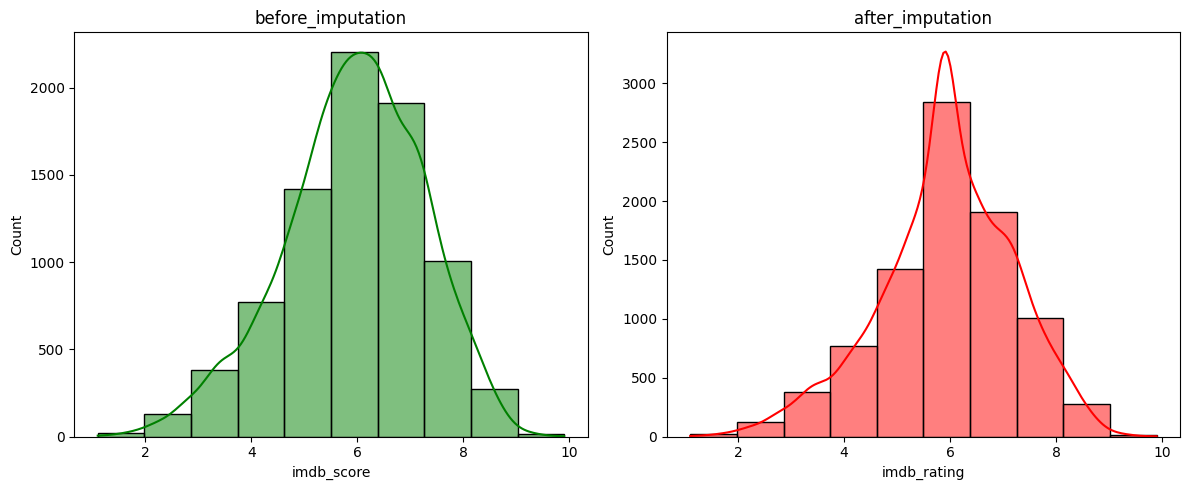

In [ ]:
plt.figure(figsize=(12,5))
#before
plt.subplot(1,2,1)
sns.histplot(amazon_two_data['imdb_score'],bins=10,color='green',kde=True)
plt.title('before_imputation')

#after_imputation
plt.subplot(1,2,2)
sns.histplot(amazon_two_data['imdb_rating'],bins=10,color='red',kde=True)
plt.title('after_imputation')

plt.tight_layout()
plt.show()

In [ ]:
print("Before Imputation:\n", amazon_two_data['imdb_score'].describe())
print("\nAfter Imputation:\n", amazon_two_data['imdb_rating'].describe())


Before Imputation:
 count    8130.000000
mean        5.932386
std         1.319092
min         1.100000
25%         5.100000
50%         6.000000
75%         6.900000
max         9.900000
Name: imdb_score, dtype: float64

After Imputation:
 count    8768.000000
mean        5.930030
std         1.270216
min         1.100000
25%         5.200000
50%         5.900000
75%         6.800000
max         9.900000
Name: imdb_rating, dtype: float64


In [ ]:
amazon_two_data

,imdb_score,id,imdb_rating
0,5.6,tm100001,5.6
1,5.4,tm1000022,5.4
2,4.4,tm1000169,4.4
3,4.5,tm1000203,4.5
4,NaN,tm1000290,5.9
...,...,...,...
8763,7.2,ts968,7.2
8764,5.7,ts97421,5.7
8765,7.2,ts97576,7.2
8766,8.2,ts9770,8.2


In [ ]:
amazon_two_data=amazon_two_data.drop('imdb_score',axis=1)

In [ ]:
amazon_prime_video=amazon_prime_video.drop('imdb_score',axis=1)

In [ ]:
amazon_prime = amazon_prime_video.merge(amazon_two_data, on='id', how='left')


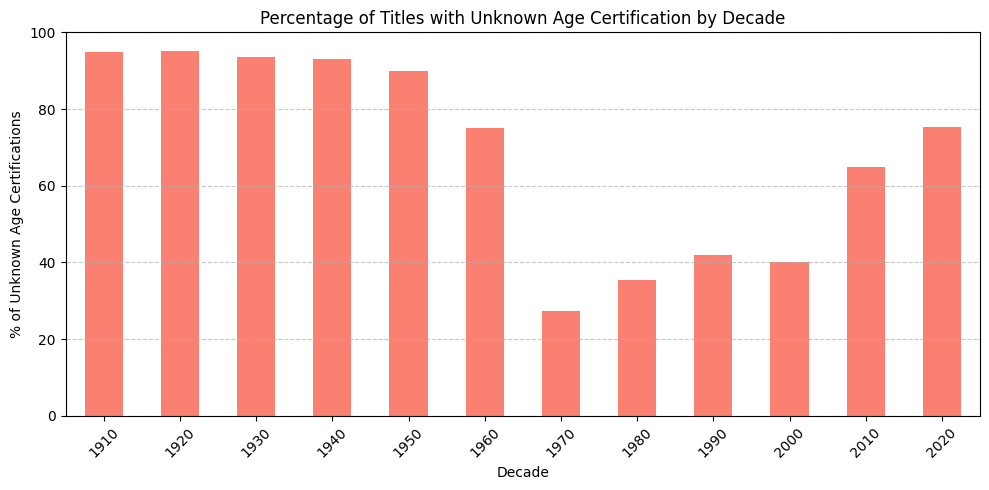

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Create 'decade' column
amazon_prime['decade'] = (amazon_prime['release_year'] // 10) * 10

# Step 2: Count total and unknown per decade
decade_total = amazon_prime.groupby('decade').size()
decade_unknown = amazon_prime[amazon_prime['age_certification'] == 'Unknown'].groupby('decade').size()

# Step 3: Calculate percentage
decade_percent_unknown = (decade_unknown / decade_total * 100).fillna(0)

# Step 4: Plot
plt.figure(figsize=(10,5))
decade_percent_unknown.plot(kind='bar', color='salmon')
plt.title('Percentage of Titles with Unknown Age Certification by Decade')
plt.xlabel('Decade')
plt.ylabel('% of Unknown Age Certifications')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
#insight and Observation

#Historical context: Certification data is sparse in early cinema.

#Mid-century improvement: Likely the result of stricter regulations and better archiving.

#Modern spike: Could reflect changes in distribution (streaming, international content) rather than negligence.



In [ ]:
amazon_prime[['imdb_rating','title','tmdb_popularity']].max()

,0
imdb_rating,9.9
title,爱，来的刚好
tmdb_popularity,1437.9


In [ ]:
amazon_prime.isnull().mean().sort_values(ascending=False)*100

In [ ]:
#importing all important libraries
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
df= amazon_prime[['imdb_votes', 'tmdb_score', 'tmdb_popularity']].copy()

#Before applying the knn imputer scaling the data since KNN is distance based
scaler = StandardScaler()
scaled_knn_data = scaler.fit_transform(df)

#applying KNNImputer
imputer=KNNImputer(n_neighbors=5)
imputed_data=imputer.fit_transform(scaled_knn_data)

#Inverse scaling to return to original scale:
imputed=scaler.inverse_transform(imputed_data)

#updating the original dataframe
df[:] = imputed

amazon_prime[['imdb_votes', 'tmdb_score', 'tmdb_popularity']] = df

In [ ]:
amazon_prime.to_csv('amazon_cleaned.csv', index=False)


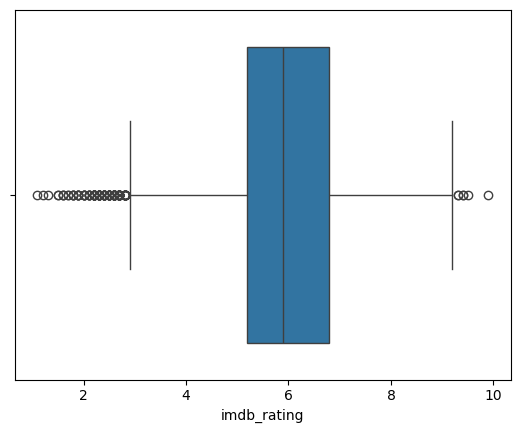

In [ ]:
#checking if there are any outliers
#should be less than 10
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='imdb_rating', data=amazon_prime)

# Display the plot
plt.show()

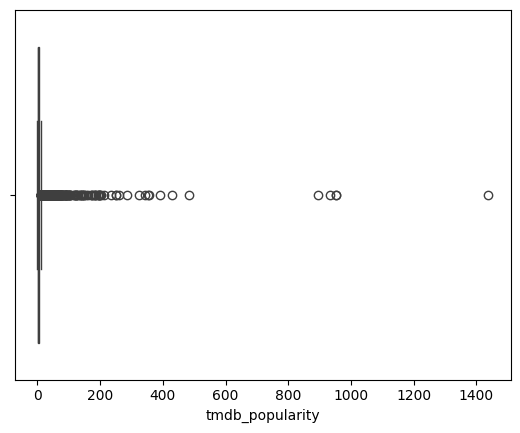

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='tmdb_popularity', data=amazon_prime)

# Display the plot
plt.show()

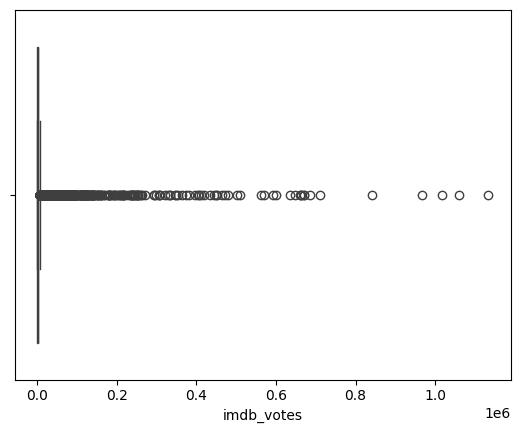

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='imdb_votes', data=amazon_prime)

# Display the plot
plt.show()

In [ ]:
amazon_prime[['imdb_votes','tmdb_score','tmdb_popularity','imdb_rating']].max()

#"IMDB votes and TMDB popularity are open-ended metrics and can reach very high values, so they do not have fixed upper limits.
 #However, TMDB scores and IMDB ratings are expected to fall within a 0 to 10 range.
 #Any value exceeding 10 in these columns should be considered an outlier or a data error."

,0
imdb_votes,1133692.0
tmdb_score,10.0
tmdb_popularity,1437.9
imdb_rating,9.9


<Axes: xlabel='tmdb_popularity'>

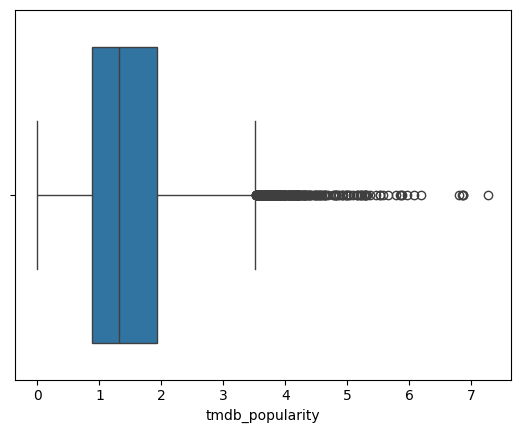

In [ ]:
# For visualization
sns.boxplot(x=np.log1p(amazon_prime['tmdb_popularity']))


In [ ]:
#Identified that tmdb_popularity can go arbitrarily high
#its not a error
#Used log1p() to normalize the feature

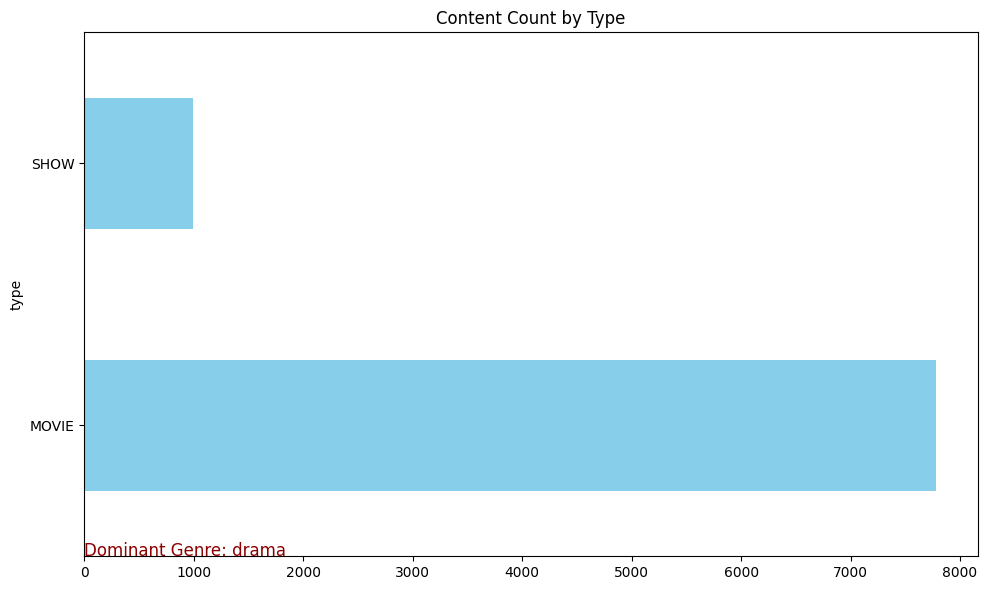

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Assume amazon DataFrame is already loaded
df = amazon_prime[['genres', 'type']].copy()

# Find the most common genre
top_genre = df['genres'].value_counts().idxmax()
top_genre_count = df['genres'].value_counts().max()

# Plot horizontal bar chart for types
ax = df.groupby('type').size().plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.title('Content Count by Type')

# Add annotation about dominant genre
plt.text(0.5, -0.5, f'Dominant Genre: {top_genre}', fontsize=12, color='darkred')

plt.tight_layout()
plt.show()


In [ ]:
###Observation

#genre drama is dominating on the platform

In [ ]:
#IMDb Ratings & Popularity: What are the highest-rated or most popular shows on the platform?
import plotly.express as px
import pandas as pd

u=amazon_prime[['title','imdb_rating','type','imdb_votes','release_year']]
x=u.groupby(['title','imdb_rating','type','release_year','imdb_votes'],as_index=False)['imdb_rating'].max()
popularity=x.sort_values('imdb_rating',ascending=False).head(10)

# Plot
fig = px.bar(
    data_frame=popularity,
    x='title',  # Changed to 'title' for better category visualization
    y='imdb_rating',
    color='type',
    barmode='group',
    hover_data=['release_year', 'imdb_votes']
)
fig.update_layout(title='top 10 highest rated 0r popularity with titles on amazon')
fig.show()

In [ ]:
amazon['production_countries'].apply(lambda x: len(x) == 0).sum()


np.int64(0)

In [ ]:
https://www.datacamp.com/blog/8-power-bi-projects-to-develop-your-skills

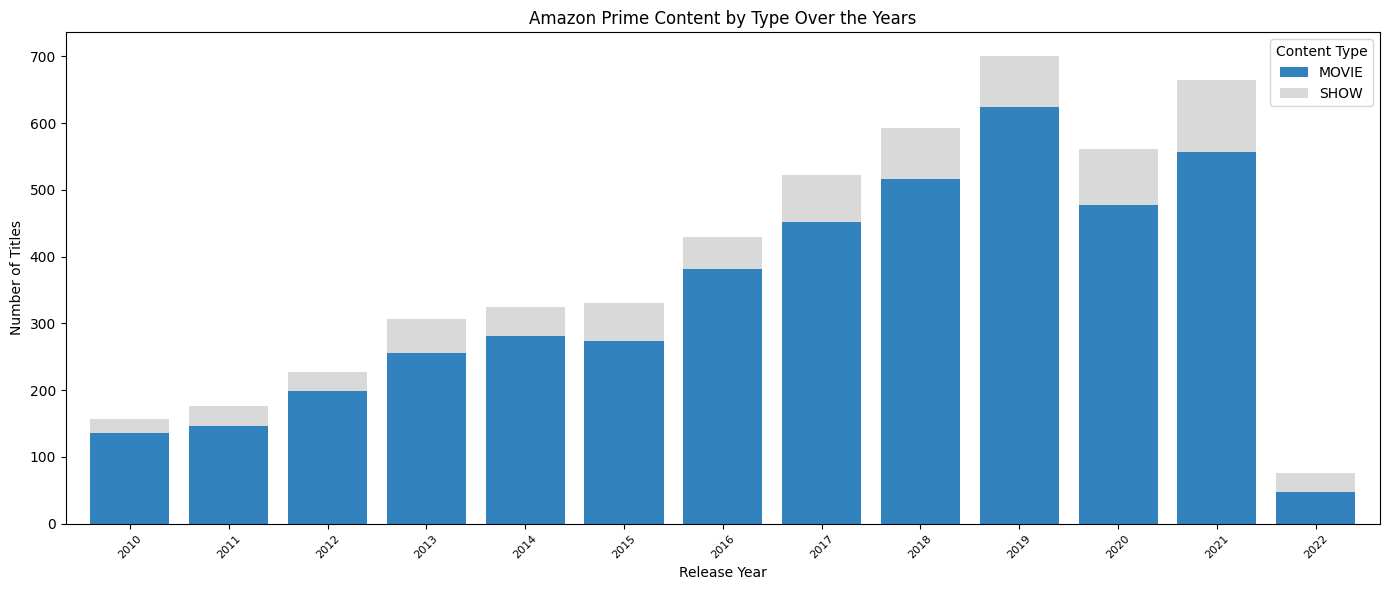

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Filter only recent years (optional: 1950 onwards)
v = amazon_prime[['release_year', 'type']]
v = v[v['release_year'] >= 2010]
colors = ['CFFFE2', 'FEFBC7']

# Group and pivot
fg = v.groupby(['release_year', 'type']).size().unstack(fill_value=0)

# Plot
fg.plot(kind='bar', stacked=True, figsize=(14, 6),
        colormap='tab20c', width=0.8)

plt.title("Amazon Prime Content by Type Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45, fontsize=8)
plt.legend(title="Content Type")
plt.tight_layout()
plt.show()


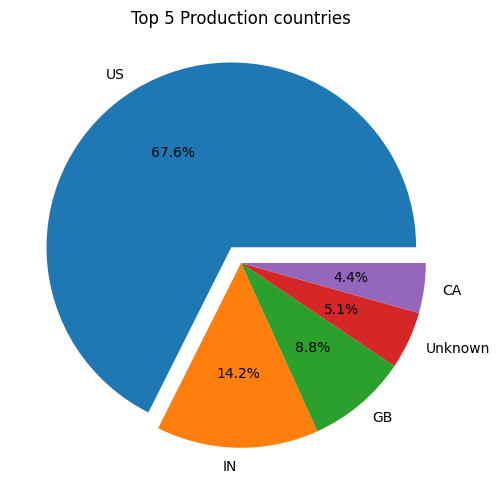

In [ ]:
#Vizualising with top 5 production countries
x=amazon_prime.groupby('production_countries').size().sort_values(ascending=False)
updated_chart=x.head(5)
updated_chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
plt.pie(updated_chart, labels=updated_chart.index,explode=[0.1,0,0,0,0],autopct='%1.1f%%')
plt.title('Top 5 Production countries')
plt.show()

In [ ]:
#US dominates the content library — no surprise, since many titles originate from Hollywood.

#UK and India have strong presence — lots of English-language and regional content.

#Canada and France round out the top 5 — both have active film/TV industries.

In [ ]:
amazon.head(30)

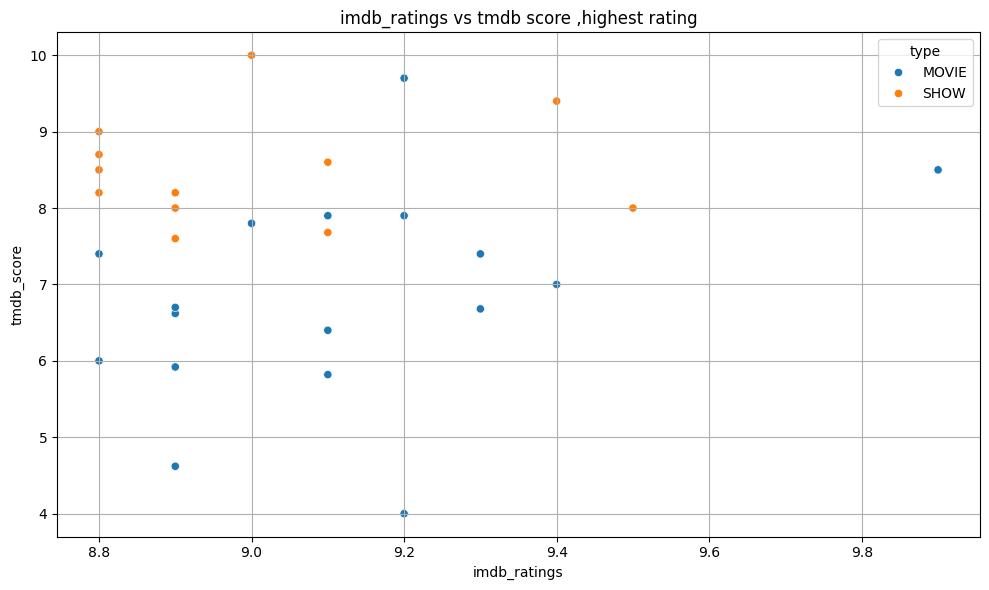

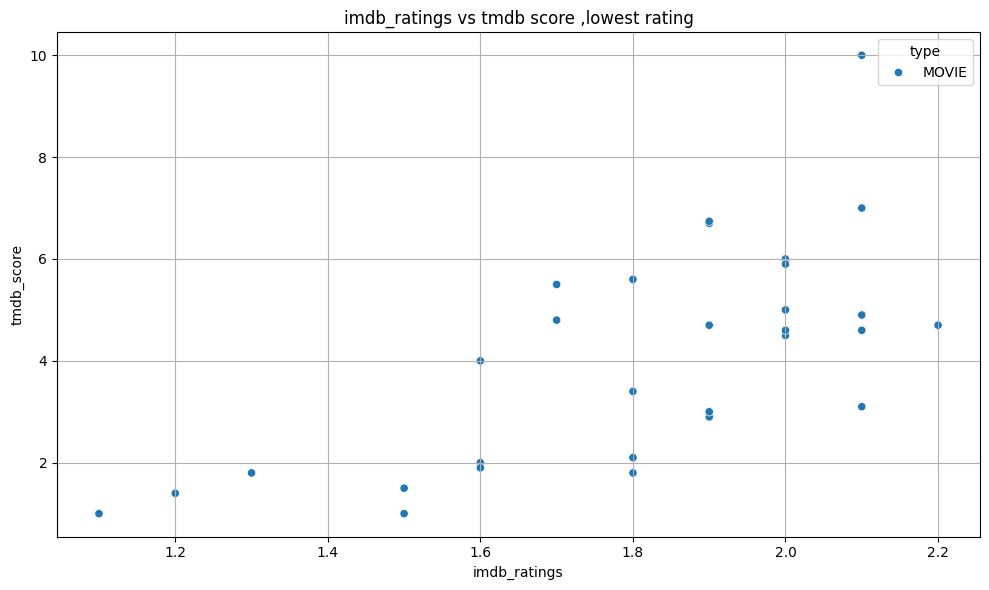

In [ ]:
#Highest Rating VS Lowest Rating


import matplotlib.pyplot as plt
import seaborn as sns
updated_scatter=amazon_prime.groupby(['title','imdb_rating','type','tmdb_score'],as_index=False)['imdb_rating'].max()

up=updated_scatter.sort_values('imdb_rating',ascending=False).head(30)

plt.figure(figsize=(10,6))
sns.scatterplot(data=up, x='imdb_rating',y='tmdb_score',hue='type')
plt.title('imdb_ratings vs tmdb score ,highest rating')
plt.xlabel('imdb_ratings')
plt.ylabel('tmdb_score')
plt.grid(True)
plt.tight_layout()
plt.show()


lowest_ratings=updated_scatter.sort_values('imdb_rating',ascending=True).head(30)
plt.figure(figsize=(10,6))
sns.scatterplot(data=lowest_ratings, x='imdb_rating',y='tmdb_score',hue='type')
plt.title('imdb_ratings vs tmdb score ,lowest rating')
plt.xlabel('imdb_ratings')
plt.ylabel('tmdb_score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
up=updated_scatter.sort_values('imdb_rating',ascending=True).head(30)
up


In [ ]:
low_rated_popular = amazon_prime[(amazon_prime['imdb_votes'] > 50000) & (amazon_prime['imdb_rating'] < 5)]
low_rated_popular.groupby(['title','imdb_votes','tmdb_popularity','tmdb_score','imdb_rating']).size().reset_index()


,title,imdb_votes,tmdb_popularity,tmdb_score,imdb_rating,0
0,Coolie No. 1,73228.0,4.4,5.9,4.2,1
1,Gunday,58885.0,6.6,4.9,2.2,1
2,"Legally Blonde 2: Red, White & Blonde",66316.0,19.7,5.6,4.7,1
3,Paranormal Activity 4,65750.0,23.5,5.4,4.6,1


In [ ]:
# Filter for IMDb rating around 2.0 and TMDb score near 10
weird_match = amazon_prime[
    (amazon_prime['imdb_rating'] <= 2.2) &
    (amazon_prime['tmdb_score'] >= 9.5)
]

# Show relevant columns
weird_match.groupby(['title', 'imdb_rating', 'tmdb_score', 'type','imdb_votes','tmdb_popularity']).size()


,,,,,,0
title,imdb_rating,tmdb_score,type,imdb_votes,tmdb_popularity,
Lockdown: 2025,2.1,10.0,MOVIE,179.0,3.8,1


In [ ]:
#Lockdown: 2025 is a great example of rating inconsistency. While IMDb users rated it very poorly (2.1 from 179 votes),
#TMDb shows a perfect 10.0 score — despite its low popularity score of 3.8. This indicates possible manipulation or default scoring on TMDb and highlights why cross-platform comparison requires careful validation."



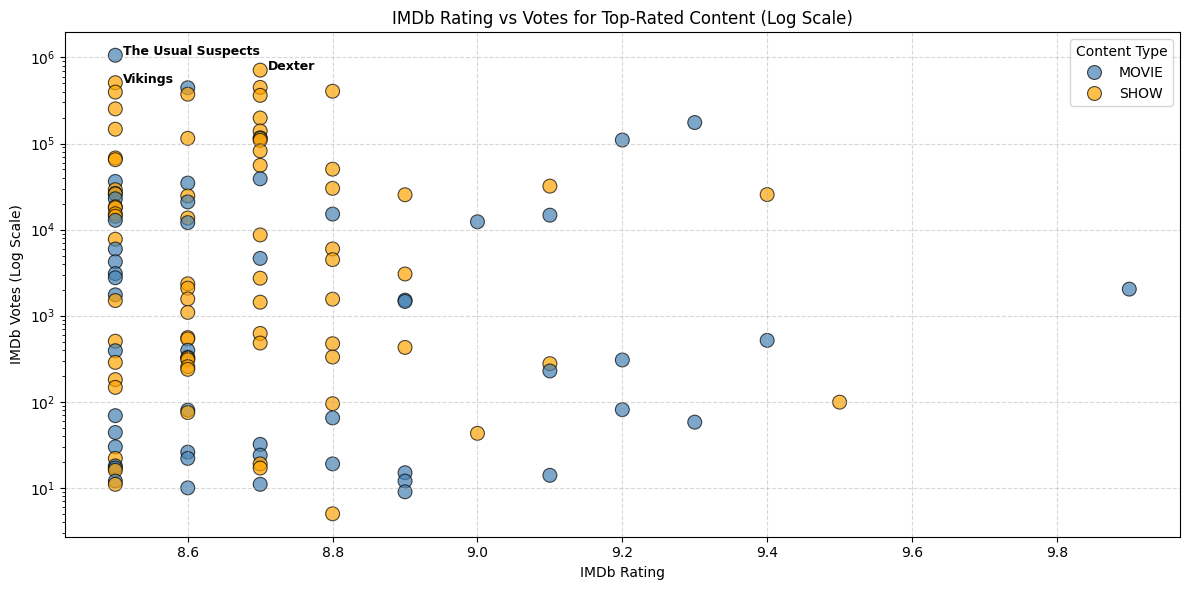

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Filter top-rated content
top_rated = amazon_prime[amazon_prime['imdb_rating'] >= 8.5].copy()

# Step 2: Drop duplicates — keep row with max votes per title
top_rated_unique = top_rated.sort_values('imdb_votes', ascending=False)

# Step 3: Select top 3 by imdb_votes
top_titles = top_rated_unique.nlargest(3, 'imdb_votes')

# Step 4: Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(
    data=top_rated_unique,
    x='imdb_rating',
    y='imdb_votes',
    hue='type',
    palette={'MOVIE': 'steelblue', 'SHOW': 'orange'},
    alpha=0.7,
    s=100,
    edgecolor='black'
)

plt.yscale('log')

# Step 5: Annotate top 3
for _, row in top_titles.iterrows():
    plt.text(row['imdb_rating'] + 0.01, row['imdb_votes'],
             row['title'], fontsize=9, fontweight='bold')

# Final formatting
plt.title('IMDb Rating vs Votes for Top-Rated Content (Log Scale)')
plt.xlabel('IMDb Rating')
plt.ylabel('IMDb Votes (Log Scale)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Content Type')
plt.tight_layout()
plt.show()


In [ ]:
#bservation =there are excellent shows and movies on the platform, movies naturally get more attention and ratings.
#Some top-rated shows are hidden gems — Amazon should invest in marketing or surface them better to users.

